In [2]:
from eval import *

Test Eval Person

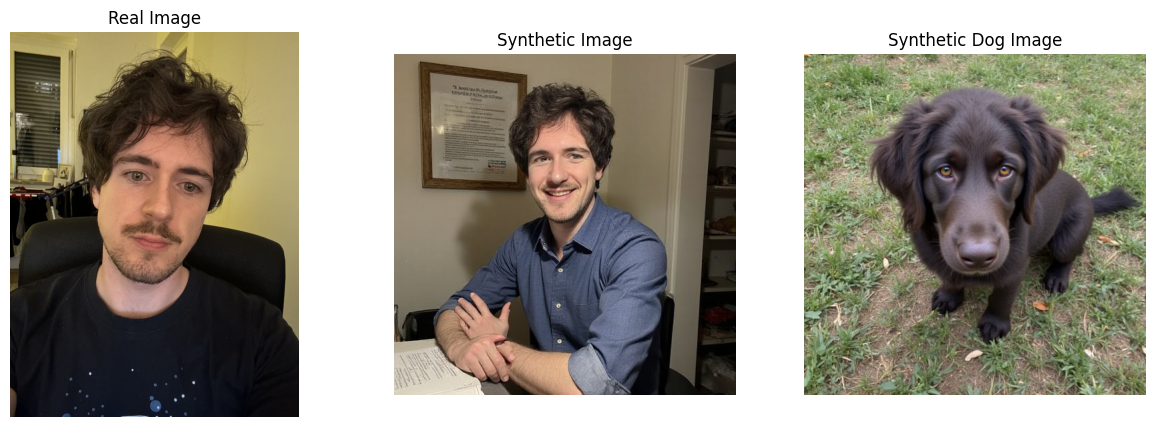

score=1.0 textual_justification='The image shows a person sitting at a table.'
score=0.0 textual_justification='The image depicts a dog, not a person or multiple people.'


In [6]:
import matplotlib.pyplot as plt
from PIL import Image
# Define the image paths and prompt
real_img_path = "../input_images/p4.jpg"
synthetic_img_path = "../loras/personal-lora-fluxdev-gpt4ocaptions/sample/personal-lora-fluxdev-gpt4ocaptions_001800_00_20250106151806.png"
synthetic_img_path_dog = "../loras/personal-lora-fluxdev-gpt4ocaptions/sample/personal-lora-fluxdev-gpt4ocaptions_001400_00_20250106150431.png"
prompt_str = "<phigep>"  # example prompt

# Load the images using PIL
real_img_pil = Image.open(real_img_path)
synthetic_img_pil = Image.open(synthetic_img_path)
synthetic_img_dog_pil = Image.open(synthetic_img_path_dog)

# Display the images using matplotlib
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(real_img_pil)
plt.title("Real Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(synthetic_img_pil)
plt.title("Synthetic Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(synthetic_img_dog_pil)
plt.title("Synthetic Dog Image")
plt.axis("off")

plt.show()

# Proceed with encoding and evaluation
real_img = encode_image(real_img_path)
synth_img = encode_image(synthetic_img_path)
synth_img_dog = encode_image(synthetic_img_path_dog)

evaluation = eval_person_llm(synth_img)
eval_dog = eval_person_llm(synth_img_dog)
print(evaluation)
print(eval_dog)

EvalScore(score=1.0, textual_justification='The image depicts a person sitting at a table with their arms crossed, smiling, and looking towards the camera. This indicates that the image is of a person, thus earning a score of 1.')

In [4]:
eval_dog

EvalScore(score=0.0, textual_justification='The image depicts a dog, not a person.')

Test Eval Same Person

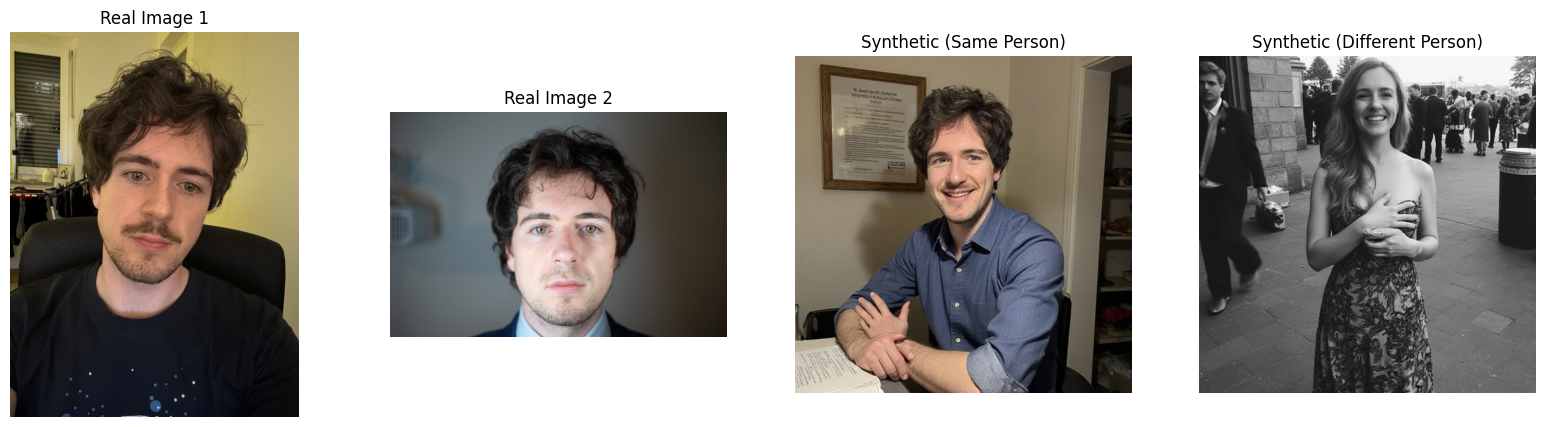

eval same person returned:  score=0.9 textual_justification='Both images show a person with similar facial features, hair color, and style. Both have dark hair of similar length, and the first image shows facial hair that could easily be absent in the second due to shaving. Both appear to have similar eye color. Variations in lighting and photography are likely causing any discrepancies. The overall resemblance suggests they could be the same person, hence a high similarity score.'
eval different person returned:  score=0.0 textual_justification='The two images show individuals with significantly different facial features, hair length, and style. The first individual appears to have short, dark hair and facial hair, while the second person has long hair and no visible facial hair. Based on these characteristics, they are unlikely to be the same person, leading to a score of 0.'
eval two real photos of same person returned (validation):  score=0.9 textual_justification='Both individuals

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the image paths and prompt
real_img_path = "../input_images/p4.jpg"
real_img_path_2 = "../input_images/p1.jpg"
synthetic_img_path = "../loras/personal-lora-fluxdev-gpt4ocaptions/sample/personal-lora-fluxdev-gpt4ocaptions_001800_00_20250106151806.png"
synthetic_img_path_different_person = "../loras/personal-lora-fluxdev-gpt4ocaptions/sample/personal-lora-fluxdev-gpt4ocaptions_000400_00_20250106142913.png"
prompt_str = "<phigep>"  # example prompt

# Load the images using PIL
real_img_pil = Image.open(real_img_path)
real_img_pil_2 = Image.open(real_img_path_2)
synth_img_pil = Image.open(synthetic_img_path)
synth_img_different_person_pil = Image.open(synthetic_img_path_different_person)

# Display the images using matplotlib in a 1x4 grid
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(real_img_pil)
plt.title("Real Image 1")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(real_img_pil_2)
plt.title("Real Image 2")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(synth_img_pil)
plt.title("Synthetic (Same Person)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(synth_img_different_person_pil)
plt.title("Synthetic (Different Person)")
plt.axis("off")

plt.show()

# Proceed with encoding the images
real_img = encode_image(real_img_path)
real_img_2 = encode_image(real_img_path_2)
synth_img = encode_image(synthetic_img_path)
synth_img_different_person = encode_image(synthetic_img_path_different_person)

# Evaluate the similarity between images using eval_same_person_llm
evaluation_same = eval_same_person_llm(real_img, synth_img)
eval_different = eval_same_person_llm(real_img, synth_img_different_person)
eval_val = eval_same_person_llm(real_img, real_img_2)

# Print the evaluation results
print("eval same person returned: ", evaluation_same)
print("eval different person returned: ", eval_different)
print("eval two real photos of same person returned (validation): ", eval_val)



Test Eval Prompt adherence

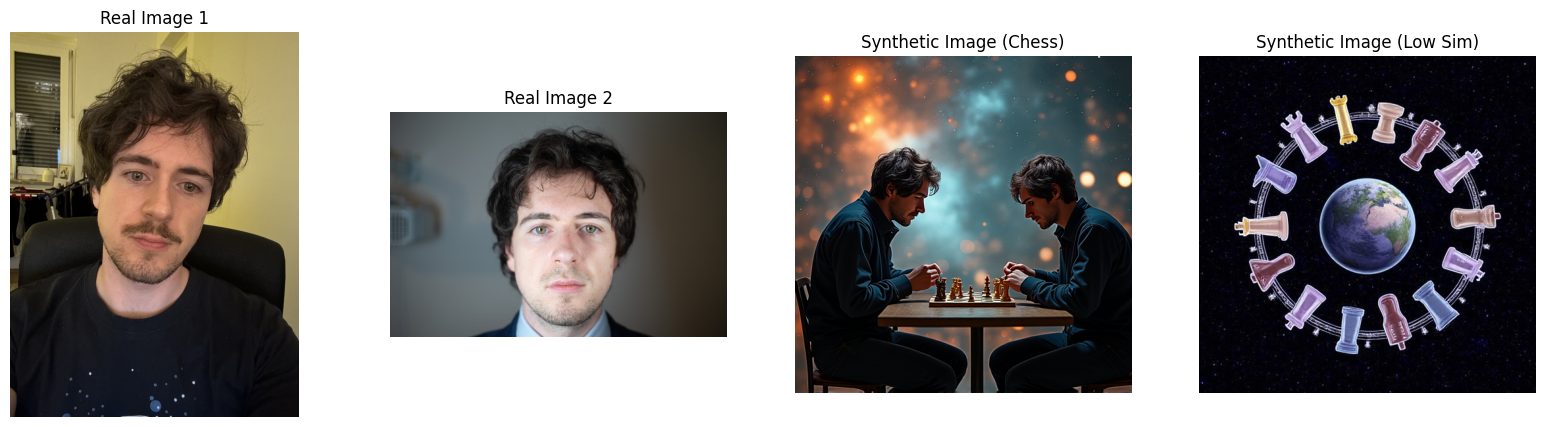

eval prompt adherence for prompt with high similarity returned:  score=0.8 textual_justification="The generated image captures the concept of playing chess in space effectively, with a cosmic background. The character in the generated image resembles the person in the real image quite well in terms of hairstyle and facial features, although exact identification isn't possible. Overall adherence to the prompt is quite high, though some fine details may differ."
eval prompt adherence for prompt with low similarity returned:  score=0.2 textual_justification="The generated image has a chess theme, shown by chess pieces arranged around Earth, but does not include <phigep> or any individual playing chess. It also represents a scene that could suggest 'space,' but lacks a person. Therefore, it does not adhere well to the prompt of <phigep> playing chess in space."
eval two real photos of same person returned (validation):  score=0.9 textual_justification='The generated image closely resembles

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

# Define the image paths and prompts
real_img_path = "../input_images/p4.jpg"
real_img_path_2 = "../input_images/p1.jpg"
synthetic_img_path = "../loras/personal-lora-fluxdev-florence2-1024/sample/personal-lora-fluxdev-florence2-1024_001200_02_20250106234100.png"
synthetic_img_path_low_sim = "../loras/personal-lora-fluxdev-florence2-r16/sample/personal-lora-fluxdev-florence2-r16_001800_02_20250107085427.png"

prompt_str_real = "<phigep>"  # example prompt for a real image
prompt_str_chess = "<phigep> playing chess in space"

# Load the images using PIL
real_img_pil = Image.open(real_img_path)
real_img_pil2 = Image.open(real_img_path_2)
synthetic_img_pil = Image.open(synthetic_img_path)
synthetic_img_low_sim_pil = Image.open(synthetic_img_path_low_sim)

# Display the images using matplotlib in a 1x4 grid
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(real_img_pil)
plt.title("Real Image 1")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(real_img_pil2)
plt.title("Real Image 2")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(synthetic_img_pil)
plt.title("Synthetic Image (Chess)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(synthetic_img_low_sim_pil)
plt.title("Synthetic Image (Low Sim)")
plt.axis("off")

plt.show()

# Proceed with encoding the images (assumes encode_image is defined)
real_img = encode_image(real_img_path)
real_img_2 = encode_image(real_img_path_2)
synth_img = encode_image(synthetic_img_path)
synth_img_different = encode_image(synthetic_img_path_low_sim)

# Evaluate prompt adherence using your function (assumes eval_prompt_adherence_llm is defined)
evaluation_chess = eval_prompt_adherence_llm(real_img, synth_img, prompt_str_chess)
eval_different = eval_prompt_adherence_llm(real_img, synth_img_different, prompt_str_chess)
eval_val = eval_prompt_adherence_llm(real_img, real_img_2, prompt_str_real)

# Print the evaluation results
print("eval prompt adherence for prompt with high similarity returned: ", evaluation_chess)
print("eval prompt adherence for prompt with low similarity returned: ", eval_different)
print("eval two real photos of same person returned (validation): ", eval_val)



In [ ]:
real_img_path = "../input_images/p4.jpg"
synthetic_img_path = "../loras/personal-lora-fluxdev-gpt4ocaptions/sample/personal-lora-fluxdev-gpt4ocaptions_001800_00_20250106151806.png"
synthetic_img_path_dog = "../loras/personal-lora-fluxdev-gpt4ocaptions/sample/personal-lora-fluxdev-gpt4ocaptions_001400_00_20250106150431.png"
prompt_str = "<phigep>"  # example prompt

real_img = encode_image(real_img_path)
synth_img = encode_image(synthetic_img_path)
synth_img_dog = encode_image(synthetic_img_path_high_qual)
evaluation = eval_image_quality_llm(synth_img)
eval_dog = eval_image_quality_llm(synth_img_low_qual)

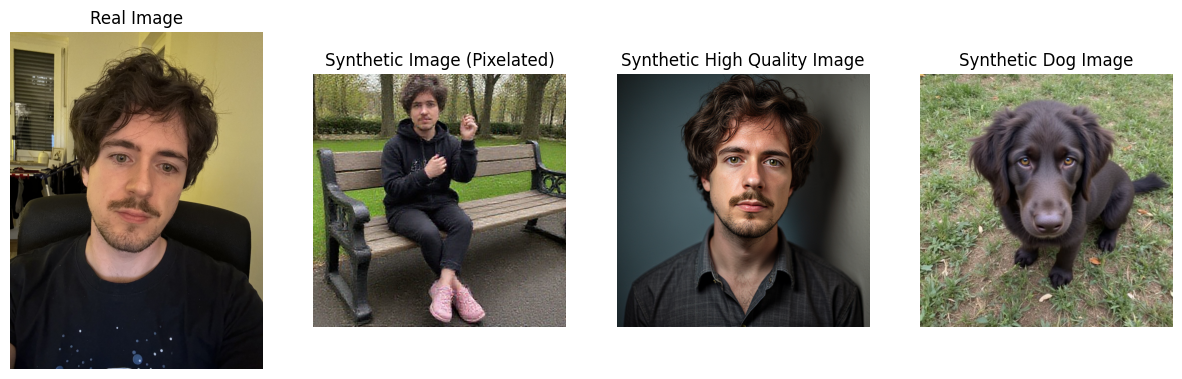

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAIAAgADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDi7Sdda0u18STXUlveW1vqduLTyGuUukG6eVXdpRKA63pjJXeyhWkLAAsty/tnk8UX0niO+sYdKvZbi8bTNQuW/czqL/amYjuMcdwswPlt8/modu59oy9AjWHQLOJJo50R/ESrLGGCuBp0XzDcAcHryAfUCugu5tI0zT7yxhu7

In [22]:
import matplotlib.pyplot as plt
from PIL import Image
from eval import *

# Define the image paths and prompt
real_img_path = "../input_images/p4.jpg"
synthetic_img_path = "../loras/personal-lora-fluxdev-florence2-r16/sample/personal-lora-fluxdev-florence2-r16_006400_01_20250107113555.png"
synthetic_img_path_dog = "../loras/personal-lora-fluxdev-gpt4ocaptions/sample/personal-lora-fluxdev-gpt4ocaptions_001400_00_20250106150431.png"
synth_hq_img_path = "../loras/personal-lora-fluxdev-florence2-1024/sample/personal-lora-fluxdev-florence2-1024_001800_00_20250107003736.png"
prompt_str = "<phigep>"  # example prompt

# Load the images using PIL
real_img_pil = Image.open(real_img_path)
synthetic_img_pil = Image.open(synthetic_img_path)
synthetic_img_dog_pil = Image.open(synthetic_img_path_dog)
synthetic_hq_img_pil = Image.open(synth_hq_img_path)
# Display the images using matplotlib in a 1x3 grid
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(real_img_pil)
plt.title("Real Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(synthetic_img_pil)
plt.title("Synthetic Image (Pixelated)")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(synthetic_hq_img_pil)
plt.title("Synthetic High Quality Image")
plt.axis("off")


plt.subplot(1, 4, 4)
plt.imshow(synthetic_img_dog_pil)
plt.title("Synthetic Dog Image")
plt.axis("off")

plt.show()

# Proceed with encoding the images
real_img = encode_image(real_img_path)
synth_img = encode_image(synthetic_img_path)  # bad pixelation this time
synth_img_dog = encode_image(synthetic_img_path_dog)
synth_hq_img = encode_image(synth_hq_img_path) 
# Evaluate the image quality using your evaluation function
evaluation = eval_image_quality_llm(synth_img)
eval_dog = eval_image_quality_llm(synth_img_dog)
eval_hiqh_qual = eval_image_quality_llm(synth_hq_img)
# Print the evaluation results
print("Evaluation for synthetic image (pixelated):", evaluation)
print("Evaluation for synthetic image (High Quality):", eval_hiqh_qual)
print("Evaluation for synthetic dog image:", eval_dog)


In [23]:
print("Evaluation for synthetic image (pixelated):", evaluation)
print("Evaluation for synthetic image (High Quality):", eval_hiqh_qual)
print("Evaluation for synthetic dog image:", eval_dog)

Evaluation for synthetic image (pixelated): score=0.4 textual_justification='The image has noticeable blurring and lacks sharpness. The edges are not well-defined, and the colors appear somewhat muted and unrealistic. Overall, the quality seems low and artificial.'
Evaluation for synthetic image (High Quality): score=0.95 textual_justification="The AI-generated image demonstrates high visual quality, with clear details, realistic lighting, and well-defined features. The color grading is also natural, enhancing its overall appearance. The canny edge result shows consistent line detection, further indicating the image's strong structure and detail."
Evaluation for synthetic dog image: score=0.9 textual_justification="The image quality is high with clear details and realistic textures in the fur and eyes of the animal. The color appears natural, and the shadowing is well-managed, giving a sense of depth. There is a good balance of light and contrast which enhances the image's realistic ap

In [12]:
eval_dog

EvalScore(score=0.8, textual_justification='The image of the dog is visually appealing with good detail and lighting. The fur texture and facial expression are particularly well-rendered, showing a high level of detail that gives the image a realistic appearance. The background blends naturally without overpowering the subject, and the colors are well-balanced. The overall composition is pleasing to the eye, contributing to a good quality visual experience.')